In [268]:
import pandas as pd
import requests
import time
import csv
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load imbd movies dataset
url = '/Users/rishikeshdhokare/Downloads/MergedDataSet/Final/final_omdb_data_no_duplicates.csv'
df = pd.read_csv(url)
df

Title  \
0                                Batteries not included   
1                                   10 Cloverfield Lane   
2                            10 Things I Hate About You   
3                                              10 Years   
4                                        10 to Midnight   
5                                             10,000 BC   
6                                             10.000 Km   
7                                        102 Dalmatians   
8                                                 10x10   
9                                            12 Monkeys   
10                                     12 Years a Slave   
11                                            13 Ghosts   
12                                       13 Going on 30   
13            13 Hours: The Secret Soldiers of Benghazi   
14                           1492: Conquest of Paradise   
15                                             17 Again   
16                                 2 Days in the Valley   
17                                     2 Fast 2 Furious   
18                                             2 Hearts   
19                                2001: A Space Odyssey   
20                                   20th Century Women   
21                                            21 & Over   
22                                           21 Bridges   
23                                             21 Grams   
24                                       21 Jump Street   
25                                       22 Jump Street   
26                                 24 Hour Party People   
27                                           27 Dresses   
28                                              28 Days   
29                                        28 Days Later   
30                                       28 Weeks Later   
31                                       3 Days to Kill   
32                                             3 Ninjas   
33                                   3 Ninjas Kick Back   
34                 3 Ninjas: High Noon at Mega Mountain   
35                                 3 Ninjas: Knuckle Up   
36                                          3 from Hell   
37                                     30 Days of Night   
38                                   30 Minutes or Less   
39                              3000 Miles to Graceland   
40                               300: Rise of an Empire   
41                                         3:10 to Yuma   
42                                40 Days and 40 Nights   
43                                       47 Meters Down   
44                              47 Meters Down: Uncaged   
45                                             47 Ronin   
46                                              48 Hrs.   
47                                       50 First Dates   
48                                               8 Mile   
49                                            8 Seconds   
50                                         80 for Brady   
51                                                  8MM   
52                                              9 Songs   
53                                 90 Minutes in Heaven   
54                                             99 Homes   
55                                 A Bad Moms Christmas   
56                  A Beautiful Day in the Neighborhood   
57                                     A Beautiful Mind   
58                                      A Bigger Splash   
59                                     A Bridge Too Far   
60                                         A Bronx Tale   
61                                         A Bug's Life   
62                                        A Chorus Line   
63                                    A Christmas Story   
64                                   A Clockwork Orange   
65                                   A Dangerous Method   
66                                        A Dirty Shame   
67                                    

In [272]:
#Hypothesis 1
# Convert 'Year' to numeric (integer)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter data to include only movies from the last 10 years
recent_years_df = df[df['Year'] >= (df['Year'].max() - 10)]

# Now continue with splitting genres and other operations
# Split genres and explode to separate rows
recent_years_df = recent_years_df.assign(Genre=recent_years_df['Genre'].str.split(',')).explode('Genre')

# Convert BoxOffice and imdbVotes to numeric (after removing non-numeric characters)
recent_years_df['BoxOffice'] = pd.to_numeric(recent_years_df['BoxOffice'].replace(r'[\$,]', '', regex=True), errors='coerce')
recent_years_df['imdbVotes'] = pd.to_numeric(recent_years_df['imdbVotes'].replace(',', '', regex=True), errors='coerce')

# Group by Genre and calculate average IMDb rating, vote count, and box office earnings
genre_statistics_recent_df = recent_years_df.groupby('Genre').agg(
    avg_rating=('imdbRating', 'mean'),
    avg_votes=('imdbVotes', 'mean'),
    avg_box_office=('BoxOffice', 'mean')
).reset_index()



In [274]:
# Table 1: Sorted by average rating and vote count
genre_statistics_recent_df = genre_statistics_recent_df.sort_values(by=['avg_rating', 'avg_votes'], ascending=False)
print("Table 1: Genre sorted by Average Rating and Votes")
genre_sorted_by_rating = genre_statistics_recent_df.round(2).head(6)
genre_sorted_by_rating

Table 1: Genre sorted by Average Rating and Votes


Genre  avg_rating  avg_votes  avg_box_office
25        Music        8.60    1636.00    2.647702e+06
21  Documentary        7.51   21128.67    5.022120e+06
18    Biography        6.97  106459.93    3.133229e+07
5       History        6.79   90250.34    1.841352e+07
13          War        6.77  107943.58    1.637097e+07
17    Animation        6.74  137257.96    1.397017e+08

In [276]:
# Table 2: Sorted by avg_votes in descending order
genre_sorted_by_votes = genre_statistics_recent_df.sort_values(by='avg_votes', ascending=False)
print("\nTable 2: Genre sorted by Average Votes")
genre_sorted_by_votes = genre_sorted_by_votes.round(2).head(6)
genre_sorted_by_votes


Table 2: Genre sorted by Average Votes


Genre  avg_rating  avg_votes  avg_box_office
16  Adventure        6.50  266824.98    1.327446e+08
10     Sci-Fi        6.21  179966.23    4.609522e+07
1       Crime        6.47  151548.20    4.284934e+07
15     Action        6.33  151265.78    4.677430e+07
0      Comedy        6.25  146049.69    5.134102e+07
17  Animation        6.74  137257.96    1.397017e+08

In [278]:
# Table 3: Sorted by avg_box_office in descending order
genre_sorted_by_box_office = genre_statistics_recent_df.sort_values(by='avg_box_office', ascending=False)
print("\nTable 3: Genre sorted by Average Box Office")
genre_sorted_by_box_office = genre_sorted_by_box_office.round(2).head(6)
genre_sorted_by_box_office


Table 3: Genre sorted by Average Box Office


Genre  avg_rating  avg_votes  avg_box_office
17  Animation        6.74  137257.96    1.397017e+08
16  Adventure        6.50  266824.98    1.327446e+08
23    Fantasy        6.03  134436.00    6.740930e+07
3      Family        6.55   59713.27    6.007196e+07
0      Comedy        6.25  146049.69    5.134102e+07
15     Action        6.33  151265.78    4.677430e+07

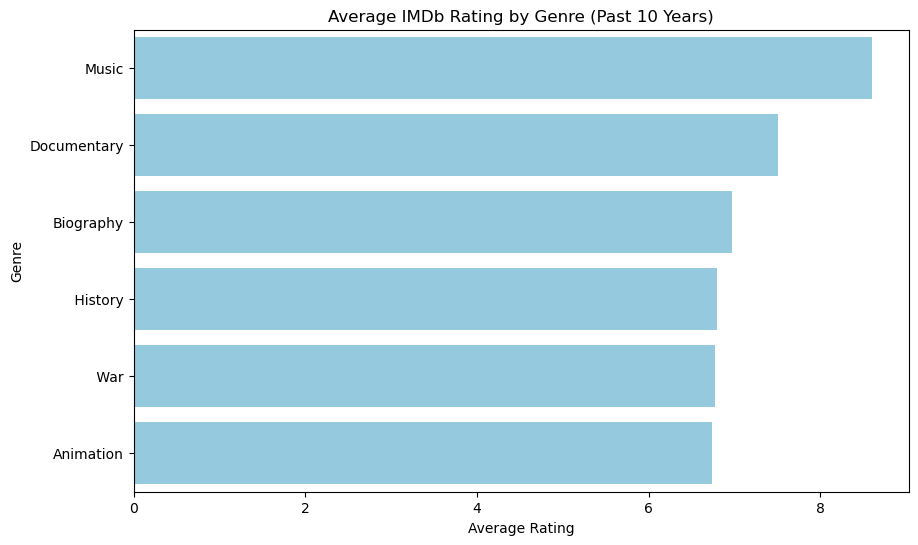

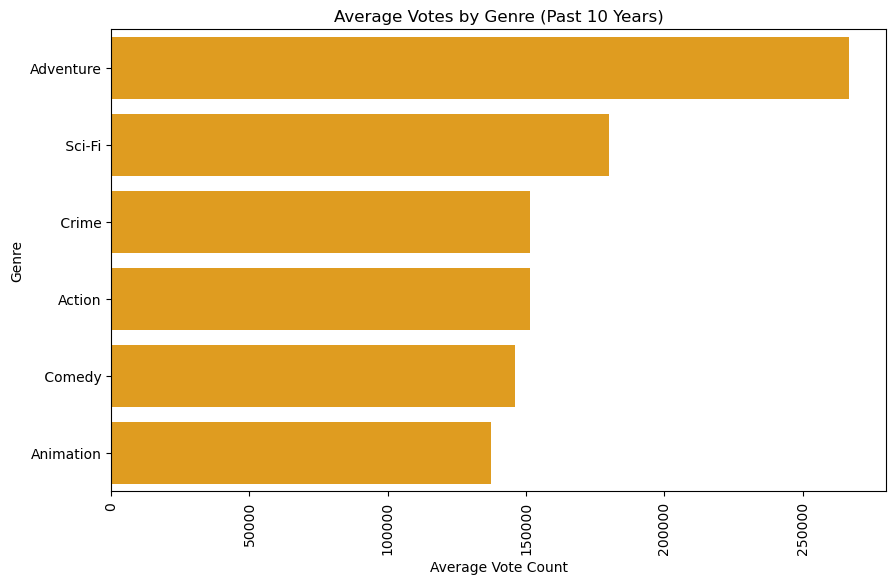

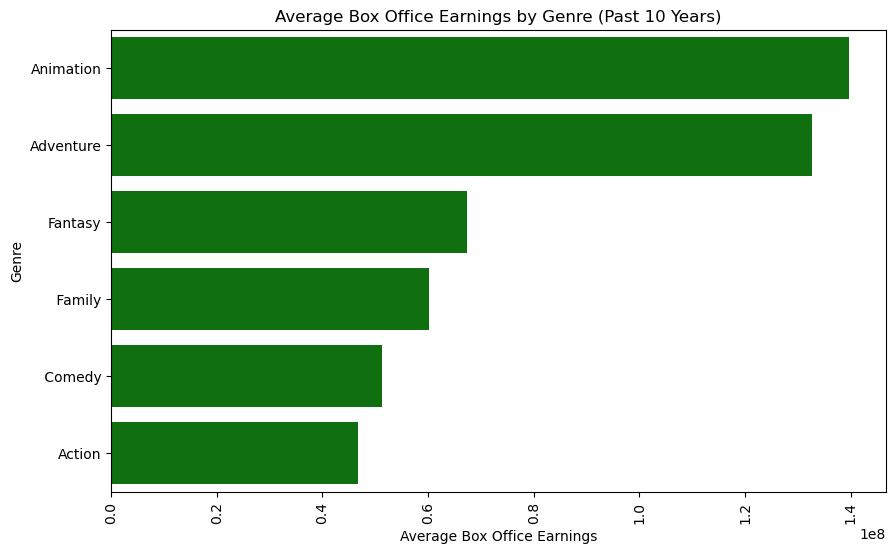

In [280]:
# Bar chart for Average Ratings by Genre
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_rating', y='Genre', data=genre_sorted_by_rating, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average IMDb Rating by Genre (Past 10 Years)')
plt.show()

# Bar chart for Average Votes by Genre
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_votes', y='Genre', data=genre_sorted_by_votes, color='orange')
plt.xlabel('Average Vote Count')
plt.ylabel('Genre')
plt.title('Average Votes by Genre (Past 10 Years)')
plt.xticks(rotation=90)
plt.show()

# Bar chart for Average Box Office Earnings by Genre
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_box_office', y='Genre', data=genre_sorted_by_box_office, color='green')
plt.xlabel('Average Box Office Earnings')
plt.ylabel('Genre')
plt.title('Average Box Office Earnings by Genre (Past 10 Years)')
plt.xticks(rotation=90)
plt.show()